# gpt2 for Colab

1. Pre install : Package
* 한번만 하면 됨(시간 오래 걸림, 향후 구글 드라이브에서 가져다 쓰는 방식)
* 구글 드라이브 마운트 필요

In [1]:
# 향후 재사용을 위해
basePath="/content/drive/MyDrive/work/work-gpt"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os.path import isdir,join

if not isdir(basePath):
  !curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs -o sh.rustup.rs
  !sh sh.rustup.rs -v -y

In [ ]:
%%script env basePath={basePath} bash
rm -rf $basePath
if [ ! -d $basePath ]; then
  mkdir -p $basePath
  pip install --upgrade pip
  # pip install ipython==7.34.0
  PATH="/root/.cargo/bin:${PATH}"
  source "$HOME/.cargo/env"
  pip uninstall -y torch
  pip uninstall torchdata
  pip uninstall -y fastai
  pip uninstall -y transformers
  pip install wheel setuptools pip --upgrade
  pip install datasets
  pip install torch==1.12.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116
  git clone https://github.com/fastai/fastai
  pip install -e "fastai[dev]"
  pip install tokenizers==0.10.3
  pip install transformers==4.10.2
  pip install sacremoses==0.0.53
  rm -rf /tmp/pip
  rm -rf /tmp/pip1.tar
  mkdir /tmp/pip
  #cp -r sh.rustup.rs                                                   /tmp/pip/
  for i in accelerate arrow boto3 botocore bravado bravado_core Brotli captum catalyst comet_ml configobj datasets docker_pycreds dulwich everett fastai fastai Flask_Compress fqdn gitdb GitPython huggingface_hub hydra_slayer ipython isoduration jedi jmespath jsonpointer jsonref kornia lightning_utilities monotonic neptune_client ninja nvidia_cublas_cu11 nvidia_cuda_cupti_cu11 nvidia_cuda_nvrtc_cu11 nvidia_cuda_runtime_cu11 nvidia_cudnn_cu11 nvidia_cufft_cu11 nvidia_curand_cu11 nvidia_cusolver_cu11 nvidia_cusparse_cu11 nvidia_nccl_cu11 nvidia_nvtx_cu11 pathtools pip pydicom PyJWT python_box pytorch_ignite pytorch_lightning requests_toolbelt rfc3339_validator rfc3987 s3transfer sacremoses safetensors semantic_version sentencepiece sentry_sdk setproctitle simplejson smmap swagger_spec_validator tensorboardX timm tokenizers torch torch torchmetrics transformers uri_template wandb websocket_client wurlitzer ; do
    cp -r /usr/local/lib/python3.10/dist-packages/$i*  /tmp/pip/
  done
  tar -cf /tmp/pip1.tar /tmp/pip/* /root/.rustup/ /root/.cargo/ /usr/local/cuda-*
  rm -rf /tmp/pip
  cp /tmp/pip1.tar $basePath
  rm -f /tmp/pip1.tar
fi

In [ ]:
# %%script env basePath={basePath} bash
#   tar -cf /tmp/pip1.tar /tmp/pip/* /root/.rustup/ /root/.cargo/ /usr/local/cuda-*
#   rm -rf /tmp/pip
#   cp /tmp/pip1.tar $basePath
#   rm -f /tmp/pip1.tar


## 2. Pre install : huggingface Checkpoint

In [ ]:
if not isdir(join(basePath,"cache")):
  import transformers
  from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast

  tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>')
  model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")
  !cp -r ~/.cache $basePath/cache
  #!tar cf $basePath/cache.tar ~/.cache

# 로딩 부분.
## 1.Pip 로딩 만들 것...

In [3]:
%%script env basePath={basePath} bash
cp $basePath/pip1.tar /tmp
tar xf /tmp/pip1.tar -C /tmp


In [4]:
!cp -r /tmp/tmp/pip/*  /usr/local/lib/python3.10/dist-packages/

In [5]:
# !cp -r /tmp/tmp/pip/.cargo   /root/.cargo
# !cp -r /tmp/tmp/pip/.rustup/ /root/.rustup/

## 2. 체크 포인트 로딩부.

In [6]:
%%script env basePath={basePath} bash
rm -rf ~/.cache
ln -s $basePath/cache ~/.cache


In [7]:
!find /opt/nvidia/|grep libcupti.so.11.7
!find /usr/local|grep libcupti



/usr/local/cuda-11.8/targets/x86_64-linux/lib/libcupti.so.2022.3.0
/usr/local/cuda-11.8/targets/x86_64-linux/lib/libcupti.so
/usr/local/cuda-11.8/targets/x86_64-linux/lib/libcupti_static.a
/usr/local/cuda-11.8/targets/x86_64-linux/lib/libcupti.so.11.8


In [8]:
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
# from fastai.text.all import *
#import fastai
import re
from os.path import join
import pandas as pd
print(torch.__version__)
print(transformers.__version__)
# print( fastai.__version__)



1.12.0+cu116
4.10.2


In [9]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>')
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")
device=torch.device('cuda:0')
model.to(device)
#test tokenizer
print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

#test model ouput
text = """위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 """
input_ids = tokenizer.encode(text)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:588: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']


In [10]:
gen_ids = model.generate(torch.tensor([input_ids]).cuda(),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())


In [26]:
%%bash
echo "txt
<s>안녕하세요.<unused0> 반갑습니다.</s>
<s>당신은<unused0>사랑받기 위해 태어난 사람.</s>
<s>너는<unused0>아름다운 사람.</s>" > data.csv

In [27]:
#df=pd.read_csv(join(basePath,'data.csv'))
df=pd.read_csv('data.csv')
lines=' '.join(df['txt'].tolist())
# lines=" ".join(lines.split())
len(lines)
lines=re.sub('\(계속\).*?[●○]', '', lines)
lines=re.sub('[●○]', '', lines)
len(lines)


91

In [28]:
# !git clone https://github.com/fastai/fastai
# !pip install -e "fastai[dev]"


In [29]:
import fastai
import torch
torch.__version__


'1.12.0+cu116'

In [30]:
from fastai.text.all import *



In [31]:

#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)
# dls.show_batch(max_n=2)


#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]




In [32]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


SuggestedLRs(valley=6.918309736647643e-06)


epoch,train_loss,valid_loss,perplexity,time
0,0.095579,None,None,00:00
1,0.139401,None,None,00:00
2,0.095043,None,None,00:00
3,0.151751,None,None,00:00
4,0.137265,None,None,00:00
5,0.127310,None,None,00:00
6,0.123566,None,None,00:00
7,0.108641,None,None,00:00
8,0.100998,None,None,00:00
9,0.099664,None,None,00:00


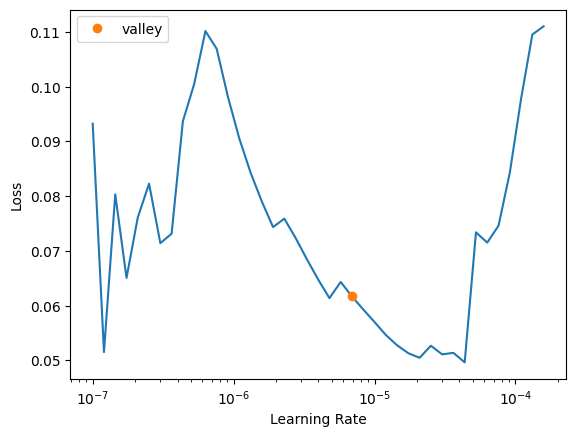

In [33]:
lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(100, lr)

In [34]:


prompt="위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda() # GPU사용시
#inp = tensor(prompt_ids)[None]       # CPU사용시

preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,
                           use_cache=True
                          )
tokenizer.decode(preds[0].cpu().numpy())


tensor([[ 9682,  8397,  8186, 10819,  8168, 14455, 16537,  7601,  8326,   384,
         19242, 38718, 10967, 37827, 30803, 13696,  8704,   739,     0,  9162,
         12928,     9, 10270, 20564,     1]], device='cuda:0')


In [ ]:

learn.model.save_pretrained("kogpt2novel_backup")
#model.push_to_hub("kogpt2novel")
#tokenizer.push_to_hub("kogpt2novel")

In [35]:
model.device.type

'cuda'

In [36]:
text = """<s>당신은<unused0></s>"""
input_ids = tokenizer.encode(text)

gen_ids = model.generate(torch.tensor([input_ids]).to('cuda'),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())


In [37]:
generated # 위의 트레이닝 한번더 하면 결과 좋아짐.

'<s> 당신은<unused0></s> 사랑 愛 사랑은 사랑을 위하여 태어난다\n사랑은 사랑하는 사람을 위해 태어나며, 사랑에 있어서는 반드시 필요한 것이다\n따라서 안녕하세요!\n뫼는 기다려야 할 때 찾는 사람이다,\n사랑의 의미는 무엇인가?\n당신이 원하는 것은 사랑이요, 필요로 하는 사람은 마땅히 있어야 한다.\n그러나 사랑과 관련하여 특별히 중요한 의미를 지닌다는 사실은 결코 아니다.\n왜냐하면 사랑의 의미란 곧 생명이기 때문이다.\n즉, 생명을 살리기 위해서는 태어나는 것이 아니라 살아 있는 존재이기 때문이다. 고로 그러므로 우리는 태어날 때부터 죽을 때까지 살아야 하며, 따라서 죽음은 필연적이다.\n죽음은 유한한 것이므로 무한히 존재할 수는 없다.\n그러므로 죽음을 맞이하기 위한 생명은 영원히 존재한다.\n그래야만 비로소 생명의'

In [23]:
# !tar cf /content/drive/MyDrive/work-gpt.tar /content/drive/MyDrive/work-gpt
